
<p style="background-color:purple; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:20px; padding:20px;"><strong>Hotel Review Text Dataset - Doc Sentiment Analysis and classification.</strong></p>



<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover"><span style="font-size: 20px;">AIM : </span>

- The aim of the project is to use NLP and Deep learning techniques to automatically classify Hotel Review
- documents related to customer, leveraging a dataset of Hotel texts
- This allows the system to adapt to evolving Hotel feedback and practices.

### The data is a collection of 38932  Rows and 5  column variables. Each row includes a written comment as well as additional customer information. Also each row corresponds to a customer review, and includes the variables:


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover"><span style="font-size: 20px;">Feature Information: </span>

- **1** - 0 :happy=26521, 1:not happy=12411

- **2** - a:Text Data regarding Hotel Review feedback Text Classification categoroial

<a id="2"></a>
## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> LIBRARIES NEEDED IN THE STUDY<p>


In [1]:
#LIBRARIES NEEDED IN THE STUDY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
import keras.models
#from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from PIL import Image
from keras.models import Model, Sequential
from keras.layers import GlobalAveragePooling2D , BatchNormalization;
#from models import custom_convnet
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.layers import Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.optimizers import Adam





<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">NLP</span></a>

###  In a project context, you could succinctly define NLP as "the branch of artificial intelligence (AI)focused on enabling computers to understand,interpret, and generate human language."

<a id="3"></a>
## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Loading and Reading Data <p>

In [2]:
pd.read_csv(r'D:\train.csv')


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
rw=pd.read_csv(r'D:\train.csv')


In [4]:
rw.Is_Response.value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

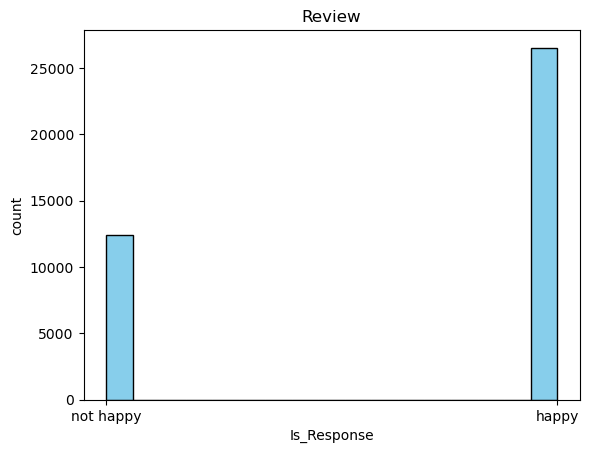

In [5]:
plt.hist(rw['Is_Response'], bins='auto', color='skyblue', edgecolor='black')

plt.xlabel('Is_Response')
plt.ylabel('count')
plt.title('Review')

plt.show()


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">Data Analysis</span></a>


In [6]:
rw.isnull().sum()>0

User_ID         False
Description     False
Browser_Used    False
Device_Used     False
Is_Response     False
dtype: bool

In [7]:
rw=rw.loc[:,['Description','Is_Response']]

In [8]:
rw

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [9]:
rw=rw.rename(columns={'Is_Response':'y','Description':'x'})

In [10]:
rw

,x,y
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [11]:
rw.y.value_counts()

happy        26521
not happy    12411
Name: y, dtype: int64

In [12]:
rw=rw.replace({'happy':0,'not happy':1})

In [13]:
rw

,x,y
0,The room was kind of clean but had a VERY stro...,1
1,I stayed at the Crown Plaza April -- - April -...,1
2,I booked this hotel through Hotwire at the low...,1
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,1
...,...,...
38927,We arrived late at night and walked in to a ch...,0
38928,The only positive impression is location and p...,1
38929,Traveling with friends for shopping and a show...,1
38930,The experience was just ok. We paid extra for ...,1




<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">Lower String</span></a>


In [14]:
rw.x=rw.x.str.lower()
# before doing any analysis convert data into lower or upper

In [15]:
rw.head()

,x,y
0,the room was kind of clean but had a very stro...,1
1,i stayed at the crown plaza april -- - april -...,1
2,i booked this hotel through hotwire at the low...,1
3,stayed here with husband and sons on the way t...,0
4,my girlfriends and i stayed here to celebrate ...,1




<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">Stop words</span></a>


In [16]:
from nltk.corpus import stopwords
l1=stopwords.words("english")
# we remove them


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">punctuation</span></a>


In [17]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return [word for word in nopunc.split() if word not in l1]

In [19]:
rw['x'].apply(text_process)

0        [room, kind, clean, strong, smell, dogs, gener...
1        [stayed, crown, plaza, april, april, staff, fr...
2        [booked, hotel, hotwire, lowest, price, could,...
3        [stayed, husband, sons, way, alaska, cruise, l...
4        [girlfriends, stayed, celebrate, th, birthdays...
                               ...                        
38927    [arrived, late, night, walked, checkin, area, ...
38928    [positive, impression, location, public, parki...
38929    [traveling, friends, shopping, show, location,...
38930    [experience, ok, paid, extra, view, pool, got,...
38931    [westin, wonderfully, restored, grande, dame, ...
Name: x, Length: 38932, dtype: object



<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">Create TDM</span></a>


In [20]:
from sklearn.feature_extraction.text import CountVectorizer  # this is used to count each and every unique word...

In [21]:
import timeit
start=timeit.default_timer()

bow_transformer=CountVectorizer(analyzer=text_process).fit(rw['x'])

stop=timeit.default_timer()
execution_time=stop-start
print("Program executed in ",execution_time)

Program executed in  11.806657699984498


In [22]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(rw['x'])

In [23]:
bow_transformer.vocabulary_

{'room': 49896,
 'kind': 32086,
 'clean': 11022,
 'strong': 56860,
 'smell': 54069,
 'dogs': 17154,
 'generally': 24428,
 'average': 3978,
 'ok': 40674,
 'overnight': 41881,
 'stay': 56082,
 'youre': 66904,
 'fussy': 24045,
 'would': 66308,
 'consider': 12868,
 'staying': 56139,
 'price': 45438,
 'right': 49476,
 'breakfast': 7339,
 'free': 23319,
 'better': 6032,
 'nothing': 39912,
 'stayed': 56113,
 'crown': 14204,
 'plaza': 44203,
 'april': 2849,
 'staff': 55642,
 'friendly': 23553,
 'attentive': 3658,
 'elevators': 18886,
 'tiny': 59833,
 'food': 22818,
 'restaurant': 48851,
 'delicious': 15475,
 'priced': 45447,
 'little': 33684,
 'high': 27315,
 'side': 53143,
 'course': 13707,
 'washington': 64508,
 'dc': 14960,
 'pool': 44591,
 'children': 10369,
 'fifth': 21902,
 'floor': 22518,
 'two': 61607,
 'comfortable': 11902,
 'beds': 5472,
 'plenty': 44290,
 'space': 54878,
 'one': 40906,
 'person': 43383,
 'tv': 61479,
 'small': 53992,
 'todays': 59976,
 'standards': 55831,
 'limited'

In [24]:
len(bow_transformer.vocabulary_)


67652

In [25]:
tdm=bow_transformer.transform(rw['x'])

In [26]:
tdm.shape

(38932, 67652)

In [27]:
type(tdm)

scipy.sparse._csr.csr_matrix


## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Pre-Processing Data  <p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Spliting Data into Train and Test</span>
</a>


In [28]:
# tdm is like our x variable 
from sklearn.model_selection import train_test_split
tdm_train,tdm_test,train_y,test_y=train_test_split(tdm,rw['y'],test_size=.2)

train_y.shape

(31145,)

In [29]:
tdm_train.shape


(31145, 67652)


## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Naive Bayes  <p>
    
### In a project, you could describe Naive Bayes as "a simple probabilistic classifier based on Bayes' theorem with the assumption of independence between features."

In [30]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()
nb.fit(tdm_train,train_y)

MultinomialNB()

In [31]:
pred_nb=nb.predict(tdm_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
tab_nb=confusion_matrix(test_y,pred_nb)
tab_nb

array([[4864,  421],
       [ 644, 1858]], dtype=int64)

In [34]:
accuracy_score(test_y,pred_nb)

0.8632335944522923

In [35]:
print(classification_report(test_y,pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5285
           1       0.82      0.74      0.78      2502

    accuracy                           0.86      7787
   macro avg       0.85      0.83      0.84      7787
weighted avg       0.86      0.86      0.86      7787




## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> LogisticRegression  <p>
    
### Logistic Regression is a statistical method used for binary classification by modeling the probability of a binary outcome based on input features."

In [36]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [37]:
logreg.fit(tdm_train,train_y)

C:\Users\Vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
pred_log=logreg.predict(tdm_test)

In [39]:
tab_log=confusion_matrix(test_y,pred_log)
tab_log

array([[4837,  448],
       [ 629, 1873]], dtype=int64)

In [40]:
accuracy_score(test_y,pred_log)

0.8616925645306279

In [41]:
print(classification_report(test_y,pred_log))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5285
           1       0.81      0.75      0.78      2502

    accuracy                           0.86      7787
   macro avg       0.85      0.83      0.84      7787
weighted avg       0.86      0.86      0.86      7787




## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> DecisionTreeClassifier  <p>
    
### The DecisionTreeClassifier is a machine learning algorithm used for classification tasks, where it builds a decision tree model to predict the class label of a new instance based on its features."

In [42]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()

In [43]:
dec.fit(tdm_train,train_y)

DecisionTreeClassifier()

In [44]:
pred_dec=dec.predict(tdm_test)

In [45]:
tab_dec=confusion_matrix(test_y,pred_dec)
tab_dec

array([[4395,  890],
       [1002, 1500]], dtype=int64)

In [46]:
accuracy_score(test_y,pred_dec)

0.7570309490175934

In [47]:
print(classification_report(test_y,pred_dec))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5285
           1       0.63      0.60      0.61      2502

    accuracy                           0.76      7787
   macro avg       0.72      0.72      0.72      7787
weighted avg       0.75      0.76      0.76      7787




## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> RandomForestClassifier  <p>
    
### The RandomForestClassifier is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and robustness in classification tasks."

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [49]:
rfc.fit(tdm_train,train_y)

RandomForestClassifier()

In [50]:
pred_rfc=rfc.predict(tdm_test)

In [51]:
tab_rfc=confusion_matrix(test_y,pred_rfc)
tab_rfc

array([[5141,  144],
       [1221, 1281]], dtype=int64)

In [52]:
accuracy_score(test_y,pred_rfc)

0.8247078464106845

In [53]:
print(classification_report(test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5285
           1       0.90      0.51      0.65      2502

    accuracy                           0.82      7787
   macro avg       0.85      0.74      0.77      7787
weighted avg       0.84      0.82      0.81      7787




<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;"> Most Frequent Words from all data</span>

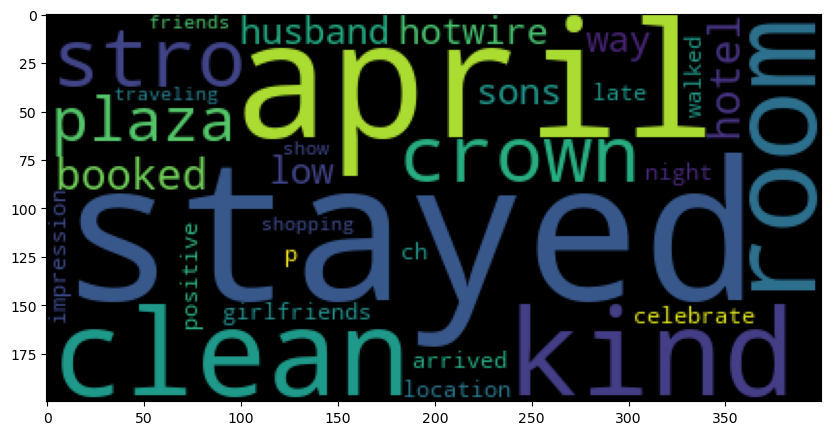

In [54]:
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=30).generate(str(rw['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)



<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Most Frequent Words from class 0 -->happy</span>

In [55]:
rw_spam_df0=rw[rw.y==0]

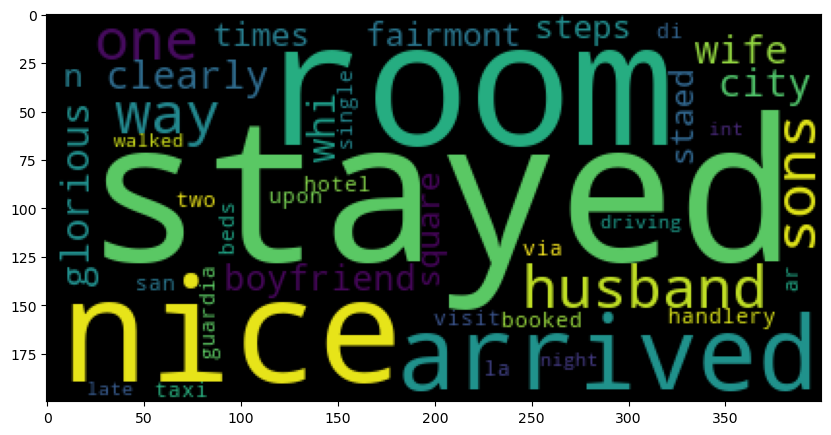

In [56]:
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=40).generate(str(rw_spam_df0['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)



<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Most Frequent Words from class 1 -->not happy</span>

In [57]:
rw_spam_df1=rw[rw.y==1]

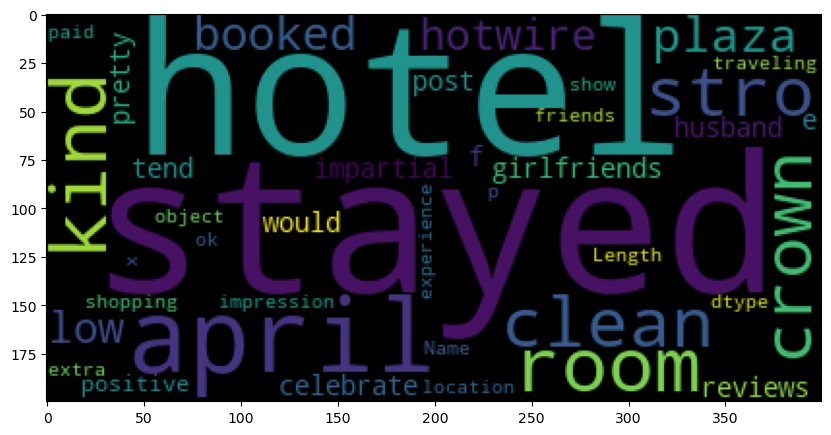

In [58]:
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=40).generate(str(rw_spam_df1['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">RNN  <p> 
### "RNNs are a type of neural network architecture designed to effectively process sequential data by retaining information about previous inputs. They achieve this by incorporating loops within their structure, allowing them to maintain a memory of past information while processing new input. This makes RNNs particularly suitablefor tasks such as time series prediction, natural language processing, and sequence generation.

In [84]:
pd.read_csv(r'D:\train.csv')

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [85]:
rw=pd.read_csv(r'D:\train.csv')

In [86]:
df=pd.DataFrame(rw['Is_Response'])

In [87]:
df['x']=rw['Description']

In [88]:
df.rename(columns={'Is_Response':'y'},inplace=True)

In [89]:
df.y=df.y.replace({'happy':0,'not happy':1})


In [90]:
df.head()

,y,x
0,1,The room was kind of clean but had a VERY stro...
1,1,I stayed at the Crown Plaza April -- - April -...
2,1,I booked this hotel through Hotwire at the low...
3,0,Stayed here with husband and sons on the way t...
4,1,My girlfriends and I stayed here to celebrate ...


In [91]:
df.y.nunique()

2

In [92]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Class blance</span>
</a>

In [93]:
train,test=train_test_split(rw)

In [94]:
df1=train[train.Is_Response==1]
train=pd.concat([train,df1,df1,df1,df1,df1,df1])

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Spliting Data into Train and Test</span>
</a>

In [95]:
df_x=df.iloc[:,1]
df_y=df.iloc[:,0]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2)

In [96]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your class labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [97]:
max_num_words=8000 #from entire corpus sleect 10000 words
seq_len=100 # how many words out of 10000 you wish to take from each document
embedding_size=100 #vector length of each word

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Sampling</span>
</a>

In [98]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [99]:
tokenizer=Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(df.x)
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [100]:
x_train=pad_sequences(x_train,maxlen=seq_len)
x_test=pad_sequences(x_test,maxlen=seq_len)

model=Sequential()
model.add(Embedding(input_dim=max_num_words,
                   input_length=seq_len,
                   output_dim=embedding_size))

In [101]:
model.add(SimpleRNN(128))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=.001)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Fit The Model</span>
</a>

In [102]:
model.fit(x_train,y_train,epochs=8,batch_size=32,validation_split=.2)

Epoch 1/8
779/779 [==============================] - 22s 26ms/step - loss: 0.5766 - accuracy: 0.6994 - val_loss: 0.4324 - val_accuracy: 0.8075
Epoch 2/8
779/779 [==============================] - 26s 34ms/step - loss: 0.4375 - accuracy: 0.8037 - val_loss: 0.5583 - val_accuracy: 0.7152
Epoch 3/8
779/779 [==============================] - 28s 36ms/step - loss: 0.4928 - accuracy: 0.7600 - val_loss: 0.4478 - val_accuracy: 0.7947
Epoch 4/8
779/779 [==============================] - 29s 37ms/step - loss: 0.4358 - accuracy: 0.8078 - val_loss: 0.5352 - val_accuracy: 0.7385
Epoch 5/8
779/779 [==============================] - 22s 29ms/step - loss: 0.4876 - accuracy: 0.7675 - val_loss: 0.4800 - val_accuracy: 0.7886
Epoch 6/8
779/779 [==============================] - 22s 29ms/step - loss: 0.4231 - accuracy: 0.8138 - val_loss: 0.4382 - val_accuracy: 0.8056
Epoch 7/8
779/779 [==============================] - 23s 29ms/step - loss: 0.4173 - accuracy: 0.8176 - val_loss: 0.4750 - val_accuracy: 0.7781

In [103]:
pred_prob=model.predict(x_test)

244/244 [==============================] - 2s 8ms/step


In [104]:
pred=pred_prob.argmax(axis=1)

In [105]:
y_test=y_test.argmax(axis=1)

In [106]:
confusion_matrix(y_test,pred)

array([[4759,  599],
       [1600,  829]], dtype=int64)

In [107]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      5358
           1       0.58      0.34      0.43      2429

    accuracy                           0.72      7787
   macro avg       0.66      0.61      0.62      7787
weighted avg       0.70      0.72      0.69      7787



In [108]:
accuracy_score(y_test,pred)

0.7176062668550147

## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">LSTM  <p> 
    
### "LSTM networks are a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem and capture long-term dependencies in sequential data. They achieve this by introducing specialized memory cells with gating mechanisms, allowing them to selectively retain and update information over multiple time steps. This enables LSTMs to effectively model complex sequential patterns, making themwell-suited for tasks such as speech recognition, language translation, and time series forecasting."    
    
    

In [109]:
pd.read_csv(r'D:\train.csv')

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [110]:
rw=pd.read_csv(r'D:\train.csv')

In [111]:
df=pd.DataFrame(rw['Is_Response'])

In [112]:
df['x']=rw['Description']

In [113]:
df.rename(columns={'Is_Response':'y'},inplace=True)

In [114]:
df.y=df.y.replace({'happy':0,'not happy':1})


In [115]:
df.head()

,y,x
0,1,The room was kind of clean but had a VERY stro...
1,1,I stayed at the Crown Plaza April -- - April -...
2,1,I booked this hotel through Hotwire at the low...
3,0,Stayed here with husband and sons on the way t...
4,1,My girlfriends and I stayed here to celebrate ...


In [116]:
df.y.nunique()

2

In [117]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Class blance</span>
</a>

In [118]:
train,test=train_test_split(rw)

In [119]:
df1=train[train.Is_Response==1]
train=pd.concat([train,df1,df1,df1,df1,df1,df1])

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Spliting Data into Train and Test</span>
</a>

In [120]:
df_x=df.iloc[:,1]
df_y=df.iloc[:,0]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2)

In [121]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your class labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [122]:
max_num_words=8000 #from entire corpus sleect 10000 words
seq_len=100 # how many words out of 10000 you wish to take from each document
embedding_size=100 #vector length of each word

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Sampling</span>
</a>

In [123]:
tokenizer=Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(df.x)
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [124]:
x_train=pad_sequences(x_train,maxlen=seq_len)
x_test=pad_sequences(x_test,maxlen=seq_len)

model=Sequential()
model.add(Embedding(input_dim=max_num_words,
                   input_length=seq_len,
                   output_dim=embedding_size))

In [125]:
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=.001)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
    <span style="font-size: 20px;">Fit The Model</span>
</a>

In [126]:
model.fit(x_train,y_train,epochs=8,batch_size=32,validation_split=.2)

Epoch 1/8
779/779 [==============================] - 59s 73ms/step - loss: 0.4125 - accuracy: 0.8157 - val_loss: 0.3541 - val_accuracy: 0.8430
Epoch 2/8
779/779 [==============================] - 54s 70ms/step - loss: 0.2881 - accuracy: 0.8841 - val_loss: 0.3433 - val_accuracy: 0.8531
Epoch 3/8
779/779 [==============================] - 54s 69ms/step - loss: 0.2337 - accuracy: 0.9081 - val_loss: 0.4075 - val_accuracy: 0.8496
Epoch 4/8
779/779 [==============================] - 57s 73ms/step - loss: 0.1879 - accuracy: 0.9283 - val_loss: 0.3976 - val_accuracy: 0.8537
Epoch 5/8
779/779 [==============================] - 54s 69ms/step - loss: 0.1575 - accuracy: 0.9421 - val_loss: 0.4274 - val_accuracy: 0.8403
Epoch 6/8
779/779 [==============================] - 54s 69ms/step - loss: 0.1320 - accuracy: 0.9512 - val_loss: 0.4979 - val_accuracy: 0.8354
Epoch 7/8
779/779 [==============================] - 55s 70ms/step - loss: 0.1132 - accuracy: 0.9612 - val_loss: 0.5593 - val_accuracy: 0.8396

In [127]:
pred_prob=model.predict(x_test)

244/244 [==============================] - 8s 31ms/step


In [128]:
pred=pred_prob.argmax(axis=1)

In [129]:
y_test=y_test.argmax(axis=1)

In [130]:
confusion_matrix(y_test,pred)

array([[4465,  857],
       [ 564, 1901]], dtype=int64)

In [131]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      5322
           1       0.69      0.77      0.73      2465

    accuracy                           0.82      7787
   macro avg       0.79      0.81      0.80      7787
weighted avg       0.82      0.82      0.82      7787



In [132]:
accuracy_score(y_test,pred)

0.8175163734429177

# Compression of Models

In [154]:

l1=('Naive Bayes ','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier',
    'RNN','LSTM')
l2=(86.50,86.55,75.30,82.36,80.00,82.52)

importances=pd.DataFrame()
importances['Models']=l1
importances['Accuracy']=l2

importances

,Models,Accuracy
0,Naive Bayes,86.50
1,LogisticRegression,86.55
2,DecisionTreeClassifier,75.30
3,RandomForestClassifier,82.36
4,RNN,80.00
5,LSTM,82.52


# CONCLUSION
- **Analyzing and classifying these types of text data can provide valuable insights for
Hotel feedback, researchers, and customer, facilitating better understanding,
Improvement, and management of Hotel Business.


<p style="background-color:purple; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:20px; padding:20px;"><strong>Thank You :)</strong></p>
